In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(train_data[0])
print(train_labels[0])
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [21]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [79]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [80]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [81]:
history = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.4901 - acc: 0.7964 - val_loss: 0.3652 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2787 - acc: 0.9051 - val_loss: 0.2878 - val_acc: 0.8894
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1981 - acc: 0.9328 - val_loss: 0.2977 - val_acc: 0.8778
Epoch 4/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1485 - acc: 0.9499 - val_loss: 0.2983 - val_acc: 0.8822
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1151 - acc: 0.9621 - val_loss: 0.3079 - val_acc: 0.8820
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0913 - acc: 0.9707 - val_loss: 0.3328 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0683 - acc: 0.9783 - val_loss: 0.4092 - val_ac

In [76]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

<IPython.core.display.Javascript object>


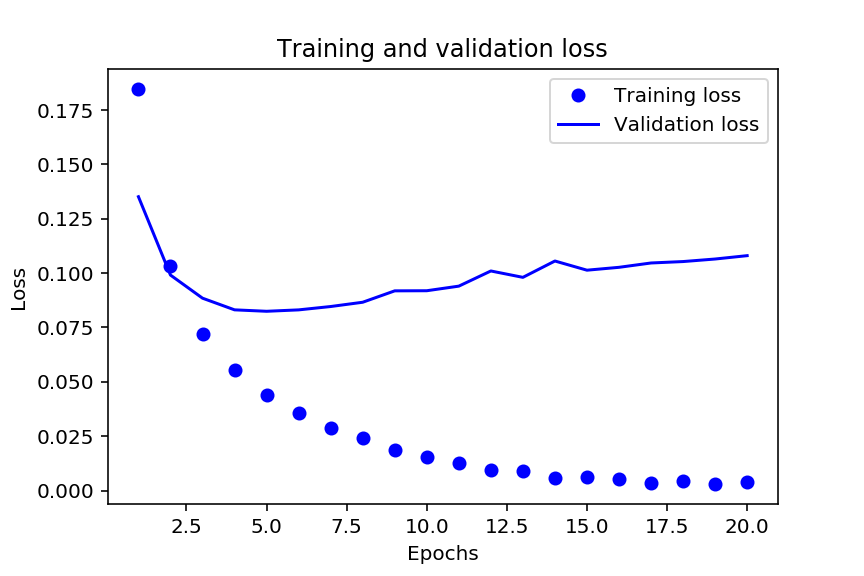

In [77]:
%matplotlib notebook
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<IPython.core.display.Javascript object>


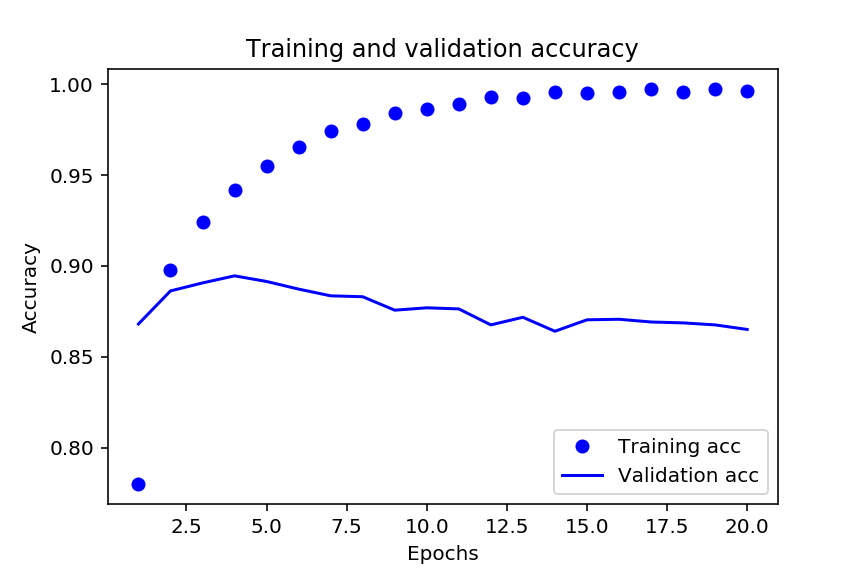

In [78]:
plt.figure()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.4877 - acc: 0.8240
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2889 - acc: 0.9038
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2204 - acc: 0.9237
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


In [57]:
results

[0.2814075825595856, 0.88788]

In [58]:
model.predict(x_test)

array([[0.21869764],
       [0.999843  ],
       [0.92839944],
       ...,
       [0.14703204],
       [0.10508917],
       [0.6024799 ]], dtype=float32)